#Set Up Code Options

In [1]:
!pip install pyproj

In [0]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyproj

In [0]:
#This line will have the full data set printed out. 
#Toggle off and clear output if you no longer want to see full dataset
pd.set_option("display.max_rows", None, "display.max_columns", None)

#read in the csv
raw_csv = 'https://raw.githubusercontent.com/dbabrams/ShallowDolomite_Group/master/Pumpage_Data_WillCounty.csv?token=ANYMEMJFLCWEXHTMSZRZIF26VSG72'

In [0]:
'''Will County'''
sw_lat =  41.41 #southwest latitude
sw_long = -88.24 #southwest longitude
ne_lat =  41.72 #northeast latitude
ne_long = -88.03 #northeast longitude


illimap = {'proj': 'lcc', # Lambert Conformal Conic
     'ellps': 'clrk66',
     'lon_0': -89.5,
     'lat_0': 33,
     'lat_1': 33,
     'lat_2': 45,
     'x_0': 2999994*0.3048,
     'y_0': 0}

prj = pyproj.Proj(illimap)

wgs84 = pyproj.Proj("epsg:4326")

nex, ney = pyproj.transform(wgs84,illimap,ne_lat,ne_long)
swx, swy = pyproj.transform(wgs84,illimap,sw_lat,sw_long)


nex, ney = round(nex/0.3048,-4), round(ney/0.3048,-4)
swx, swy = round(swx/0.3048,-4), round(swy/0.3048,-4)

#Raw Data

In [5]:
#Create a copy of the data is not edited
#This will be needed for McK for 3d
raw_data = pd.read_csv(raw_csv)
#print(raw_data)

print('size of original dataframe')
print(raw_data.shape)

size of original dataframe
(675, 46)


##Remove Lost and Deep Wells

In [8]:
#read in raw data 
raw_data_1 = pd.read_csv(raw_csv)

#drop rows if the depth, lamx, or lamy is unknown
raw_data_1.dropna(subset=['depth_total_last_known', 'lam_x', 'lam_y'], inplace = True)
    
#with this line I am dropping all of the rows that are deep wells (>400 ft)
raw_data_1.drop(raw_data_1[raw_data_1['depth_total_last_known'] > 400].index, inplace = True)

#hard code drop Channahon Park District Well 3 which has ______ for lam_x / lam_y & so dropna didn't work
raw_data_1.drop(raw_data_1[raw_data_1['p_num'] == 404003].index, inplace = True)

print('size of updated dataframe')
print(raw_data_1.shape)
raw_data_1

size of updated dataframe
(335, 46)


p_num  isws_facility_id                                         owner  \
0    152530        19713228.0                   BALMORAL WOODS COUNTRY CLUB   
1    152562        19713228.0                   BALMORAL WOODS COUNTRY CLUB   
2    158221        19714241.0             HANSON MATERIAL SERVICE - YARD 61   
3    223202        19714241.0             HANSON MATERIAL SERVICE - YARD 61   
4    224255        19714515.0                       CRETE-MONEE HIGH SCHOOL   
5    224256        19714515.0                       CRETE-MONEE HIGH SCHOOL   
7    304771        19713228.0                   BALMORAL WOODS COUNTRY CLUB   
8    338236        19770000.0                       FRANKFORT PARK DISTRICT   
9    345572        19713330.0                             ELWOOD ENERGY LLC   
10   359321        19795400.0                             COLLEGE VIEW SUBD   
11   382164        19770000.0                       FRANKFORT PARK DISTRICT   
17   400182        19790900.0                                    ROMEOVILLE   
18   400183        19790250.0                                    CREST HILL   
19   400184        19790250.0                                    CREST HILL   
20   400185        19790250.0                                    CREST HILL   
22   400187        19790500.0                                      LOCKPORT   
25   400190        19794150.0                                   BOLINGBROOK   
26   401404         4314862.0                PANDUIT CORP - NEW LENOX PLANT   
29   401620               NaN                               VALLEY CONCRETE   
30   402046         9169910.0                     KANKAKEE RIVER STATE PARK   
32   402655        19714241.0             HANSON MATERIAL SERVICE - YARD 61   
36   403991        19712600.0                        SHADY LAWN GOLF COURSE   
37   403993        19712601.0                            TUCKAWAY GOLF CLUB   
41   404001        19712819.0                       CHANNAHON PARK DISTRICT   
42   404002        19712819.0                       CHANNAHON PARK DISTRICT   
44   404004        19712821.0                     CHANNAHON SCHOOL DISTRICT   
45   404005        19712821.0                     CHANNAHON SCHOOL DISTRICT   
49   404010        19712824.0                 NE ILLINOIS AGRONOMY RESEARCH   
50   404011        19713225.0        CHICAGO MILWAUKEE ST PAUL & PACIFIC RR   
51   404012        19713226.0                 CRETE-MONEE SCHOOL DIST 201-U   
53   404014        19713227.0                           BALMORAL RACE TRACK   
54   404016        19713228.0                   BALMORAL WOODS COUNTRY CLUB   
55   404019        19713228.0                   BALMORAL WOODS COUNTRY CLUB   
56   404020        19713233.0                     LINCOLNSHIRE COUNTRY CLUB   
57   404021        19713233.0                     LINCOLNSHIRE COUNTRY CLUB   
66   404033        19713329.0                                 ALSIP NURSERY   
68   404035        19713355.0                    LINCOLN-WAY HS-EAST CAMPUS   
69   404036        19713355.0                    LINCOLN-WAY HS-EAST CAMPUS   
71   404039        19713515.0                      TROY 30C SCHOOL DISTRICT   
73   404042        19713545.0                           JOLIET COUNTRY CLUB   
74   404043        19713545.0                           JOLIET COUNTRY CLUB   
75   404044        19713545.0                           JOLIET COUNTRY CLUB   
76   404045        19713570.0                      NORTHERN ILL GAS COMPANY   
86   404057        19713620.0                                    DESOTO LLC   
92   404064        19713690.0                SEVEN-UP-KEMMERER BOTTLING INC   
108  404088        19713877.0                                     BOC GASES   
110  404090        19713936.0                          JOLIET PARK DISTRICT   
111  404091        19713936.0                          JOLIET PARK DISTRICT   
112  404092        19713933.0                         WEDGEWOOD GOLF COURSE   
113  404093        19713933.0                         WE

In [0]:
#remove wells outside model domain
#raw_data_t=raw_data_1.astype({'lam_x': 'float64','lam_y':'float64'})
raw_data_1['lam_x']=pd.to_numeric(raw_data_1['lam_x'])
raw_data_1=raw_data_1.loc[raw_data_1['lam_x']<nex]
raw_data_1=raw_data_1.loc[raw_data_1['lam_y']<ney]
raw_data_1=raw_data_1.loc[raw_data_1['lam_x']>swx]
raw_data_1=raw_data_1.loc[raw_data_1['lam_y']>swy]

##Arrange Raw Data

In [11]:
#raw_data_2 provides all of the old data but combined by facility
#reset index to be based on well owner
raw_data_2=raw_data_1.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
raw_data_2=raw_data_2.drop(['p_num','isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
raw_data_2=raw_data_2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
raw_data_2['max']=raw_data_2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 

#List facilities in order of largest pumpers to smallest
raw_data_2=raw_data_2.sort_values(by='max',ascending=False)

#remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
raw_data_3=raw_data_2.dropna(subset=['max'],axis=0)
raw_data_3['small']=raw_data_3['max']-36524250
raw_data_4=raw_data_3[raw_data_3.small > 0]

#drop extra columns so that the dataframe will just be owner and the years of pumping
raw_data_4=raw_data_4.drop(['small', 'max'], axis=1)

print(raw_data_4)
print('size of updated dataframe')
print(raw_data_4.shape)

                                                  1981  ...         2019
owner                                                   ...             
FRANKFORT                                  115798000.0  ...          NaN
HANSON MATERIAL SERVICE - YARD 61            8200000.0  ...          NaN
ILLINOIS AMERICAN - WEST SUBURBAN DIV      919209000.0  ...          NaN
ROMEOVILLE                                 157714600.0  ...          NaN
JOLIET                                     806580000.0  ...          NaN
LOCKPORT                                    46657900.0  ...  531065680.0
NEW LENOX                                  148510600.0  ...          NaN
CREST HILL                                 359102900.0  ...          NaN
SHOREWOOD                                   84764800.0  ...  179934000.0
BOLINGBROOK                                180009000.0  ...          NaN
MOKENA                                      67824600.0  ...          NaN
STEGER                                     20791120

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
raw_data_t=raw_data_4.T
#raw_data_t

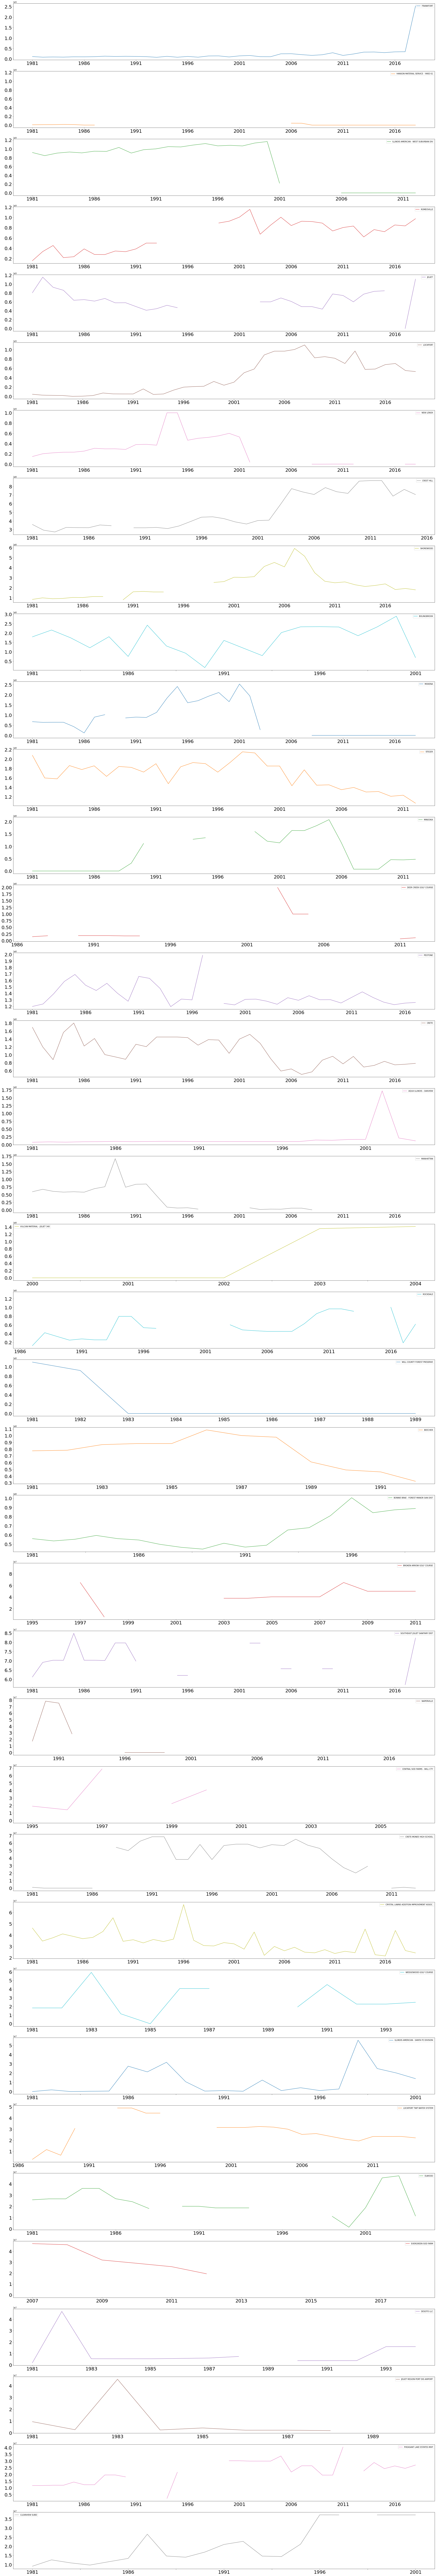

In [13]:
raw_data_t.plot(label='owner', subplots=True, figsize=(40,250), fontsize=25, sharex=False)
plt.show()

##Wiki Graphs

In [0]:
#filtering this data to just the main facilities:
raw_data_df=raw_data_t[['CREST HILL', 'JOLIET', 'LOCKPORT', 'ROMEOVILLE']]
#raw_data_df

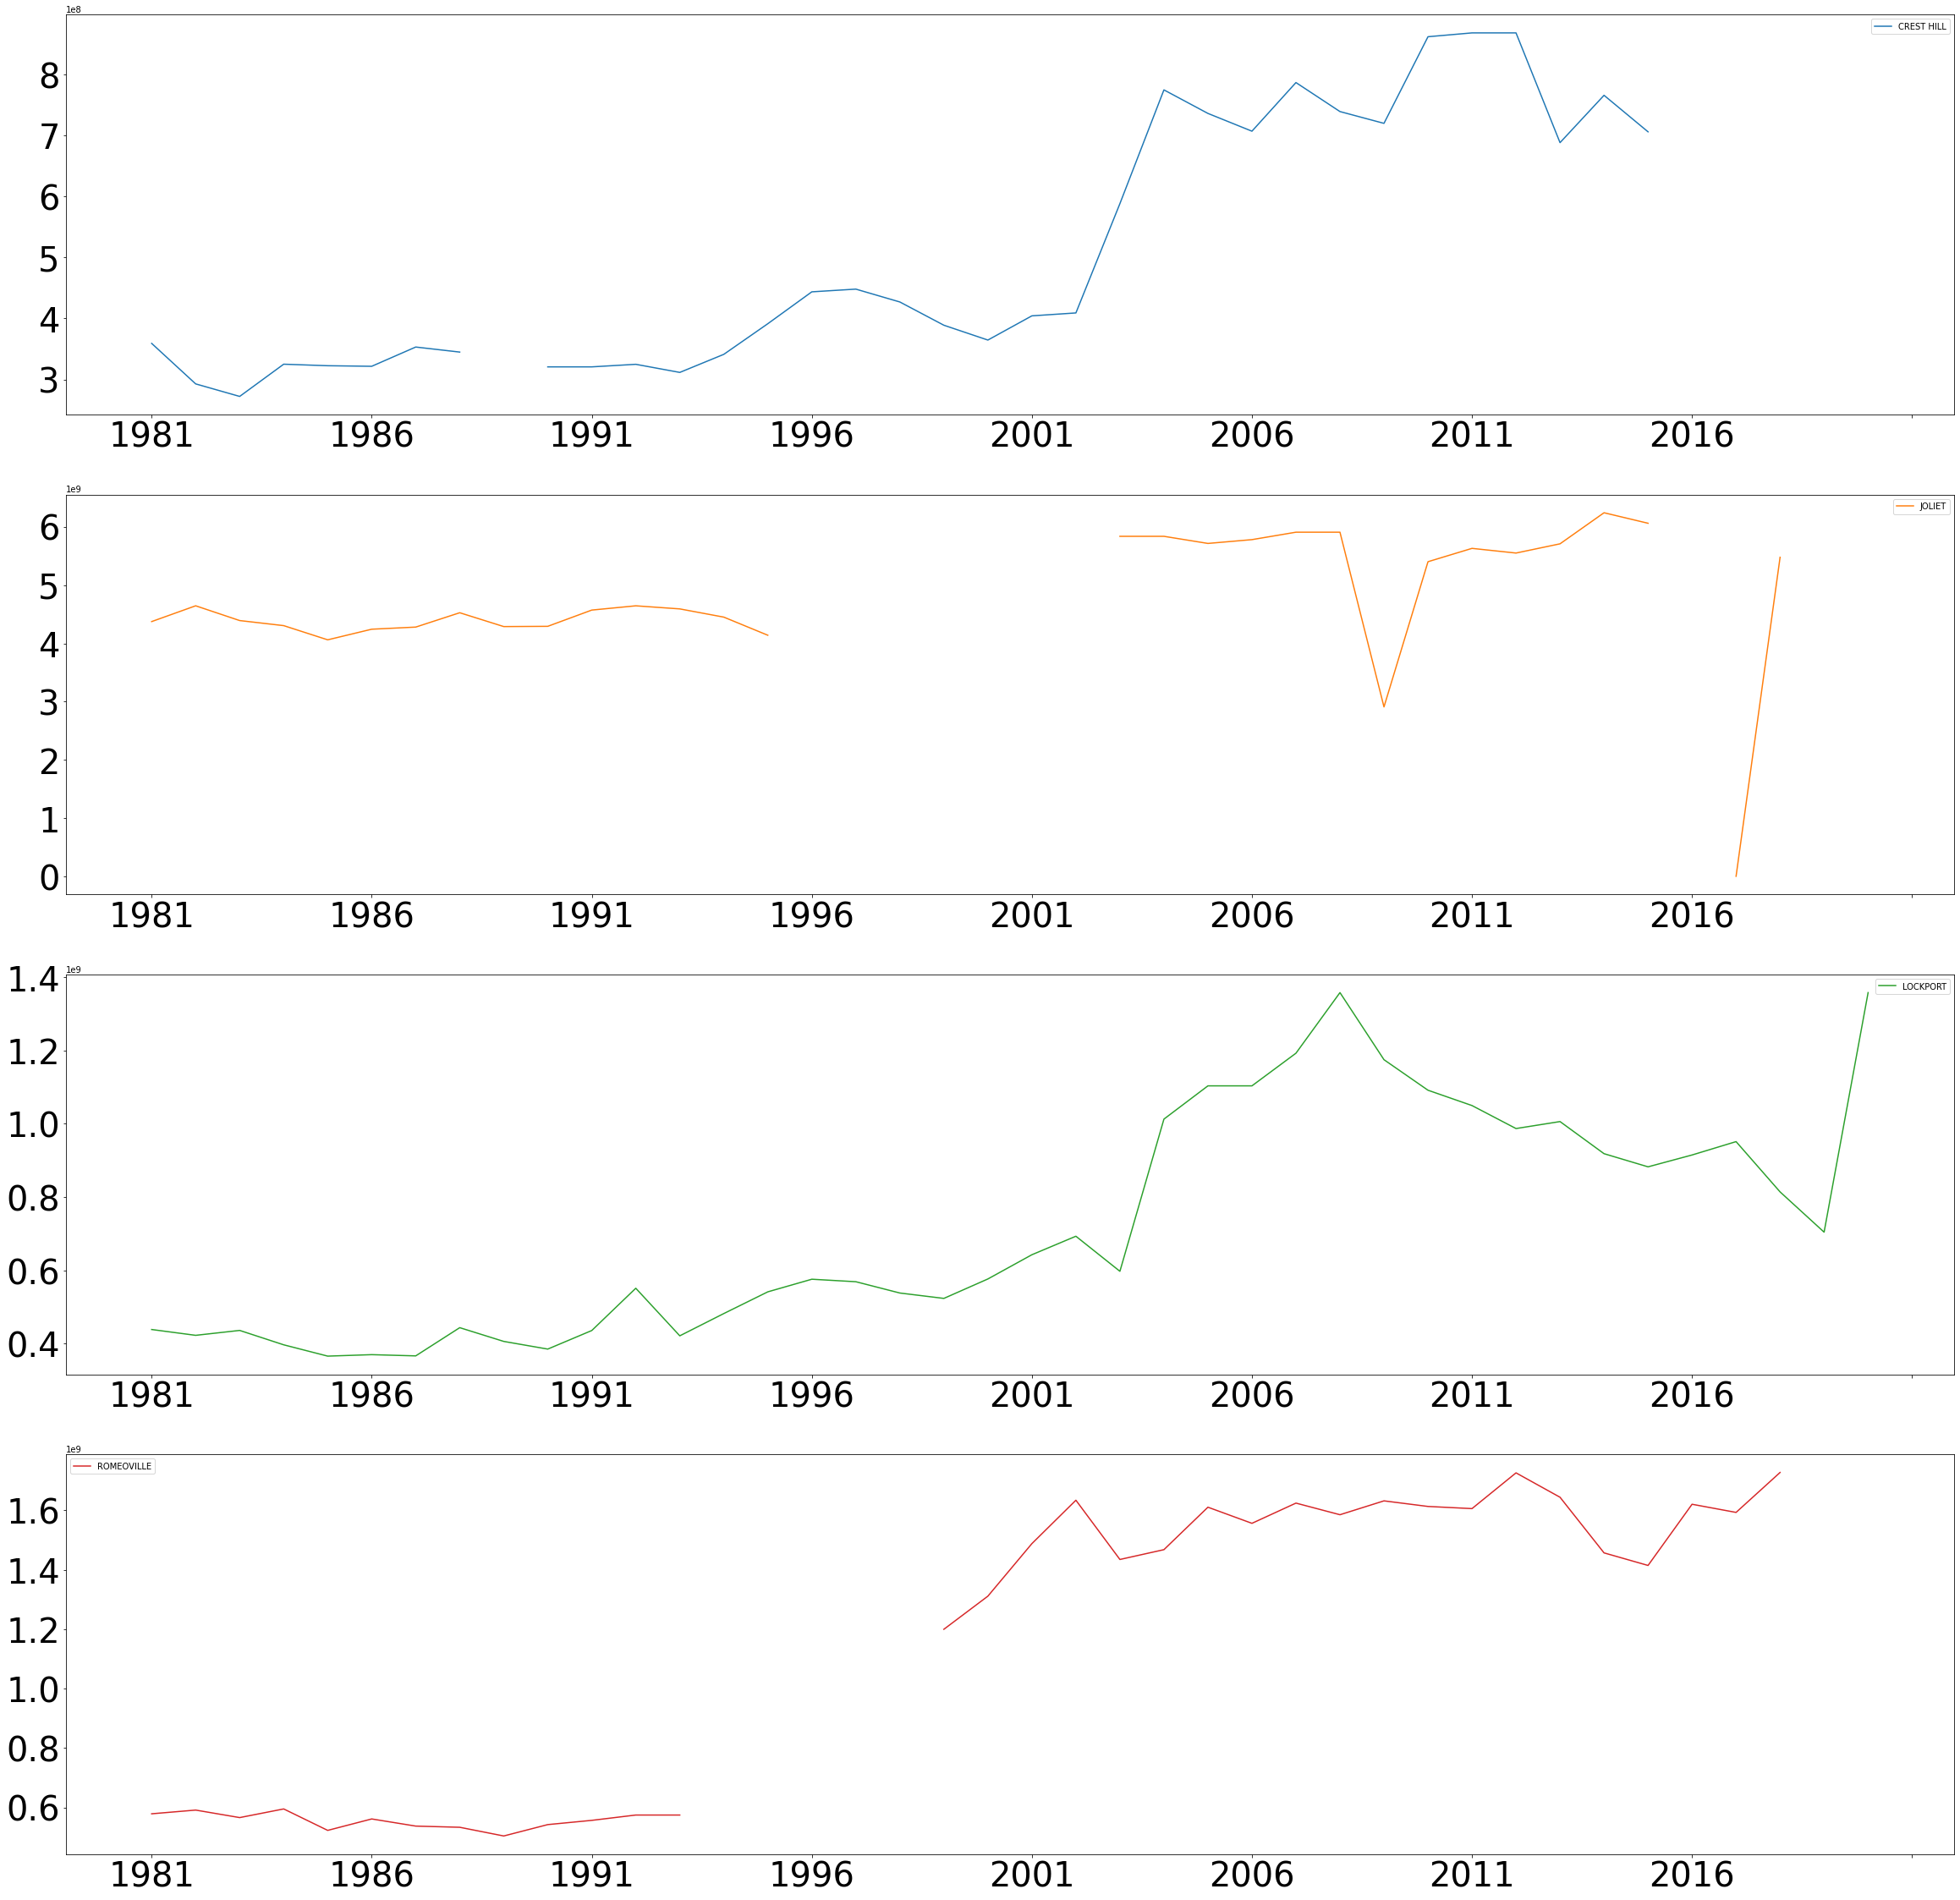

In [8]:
#plotting these main facilities
raw_data_df.plot(label='owner', subplots=True, figsize=(40,40), fontsize=40, sharex=False)
plt.show()

#Edited Data

In [12]:
#This copy of the data we will edit heavily 
df1 = pd.read_csv(raw_csv)

#drop rows if the depth, lamx, or lamy is unknown
df1.dropna(subset=['depth_total_last_known', 'lam_x', 'lam_y'], inplace = True)
    
#with this line I am dropping all of the rows that are deep wells (>400 ft)
df1.drop(df1[df1['depth_total_last_known'] > 400].index, inplace = True) 

print('size of updated dataframe')
print(df1.shape)

size of updated dataframe
(336, 46)


##Reduce Data to include only Big Wells

In [13]:
#df2 provides all of the old data but combined by facility
#reset index to be based on well owner
df2=df1.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
df2=df2.drop(['p_num','isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
df2=df2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
df2['max']=df2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 
#remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
df3=df2.dropna(subset=['max'],axis=0)
df3['small']=df3['max']-36524250
df4=df3[df3.small > 0]
df4=df4.drop(['small', 'max'], axis=1)
print('size of updated dataframe')
print(df4.shape)

size of updated dataframe
(38, 39)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


##Data Clean Up

In [11]:
#Remove Outliers
for index, row in df4.iterrows():
    ave = df4.mean(axis=1)
    df4['ave']=df4.index.map(ave)
    data_1981=df4[df4.1981 > df.ave, axis = 0]
    
df4[!rowSums(df4[-1] > df4['ave']),]
    for year, pumpage in df4.iteritems():
df4['1981']=np.where((df4['1981'] >= df4['ave']*2), np.nan)
if df4['1981'] > df4['ave']*2:
    df4['1981'] = nan
        print('Year:',year)
        print('Pumpage:', pumpage)
print(df4)

df3=df3[df3.max() > 36524250]
df3=df3.drop(df3[df3['max'] < 36524250].index, inplace=True)
df['ave']=df.mean(axis=0)
print('ave')

SyntaxError: ignored

In [14]:
#Fix end data
#Here I am taking out the more recent years
subset = df4[['2013', '2014', '2015', '2016', '2017', '2018', '2019']]

#Here I dropping the orignal recent years from the dataframe
modify3 = df4.drop(['2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis='columns')


#To bridge the more recent data, I'm doing a forward fill, back fill, and subbing in 0s
subset.fillna(method='ffill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(method='bfill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(value = 0, axis=1, inplace=True)


#This is replacing my updated recent years and forming a new dataframe
df5 = pd.concat([modify3, subset], axis = 1)

#This will fill into for up to two years of lapsed reporting data, the rest NaNs become 0
df5 = df5.fillna(method='ffill', axis='columns', limit=1)
df5 = df5.fillna(method='bfill', axis='columns', limit=1)
df5 = df5.fillna(0)

#df5

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
#swap rows and columns
df_modified_t=df5.T
#df_modified_t

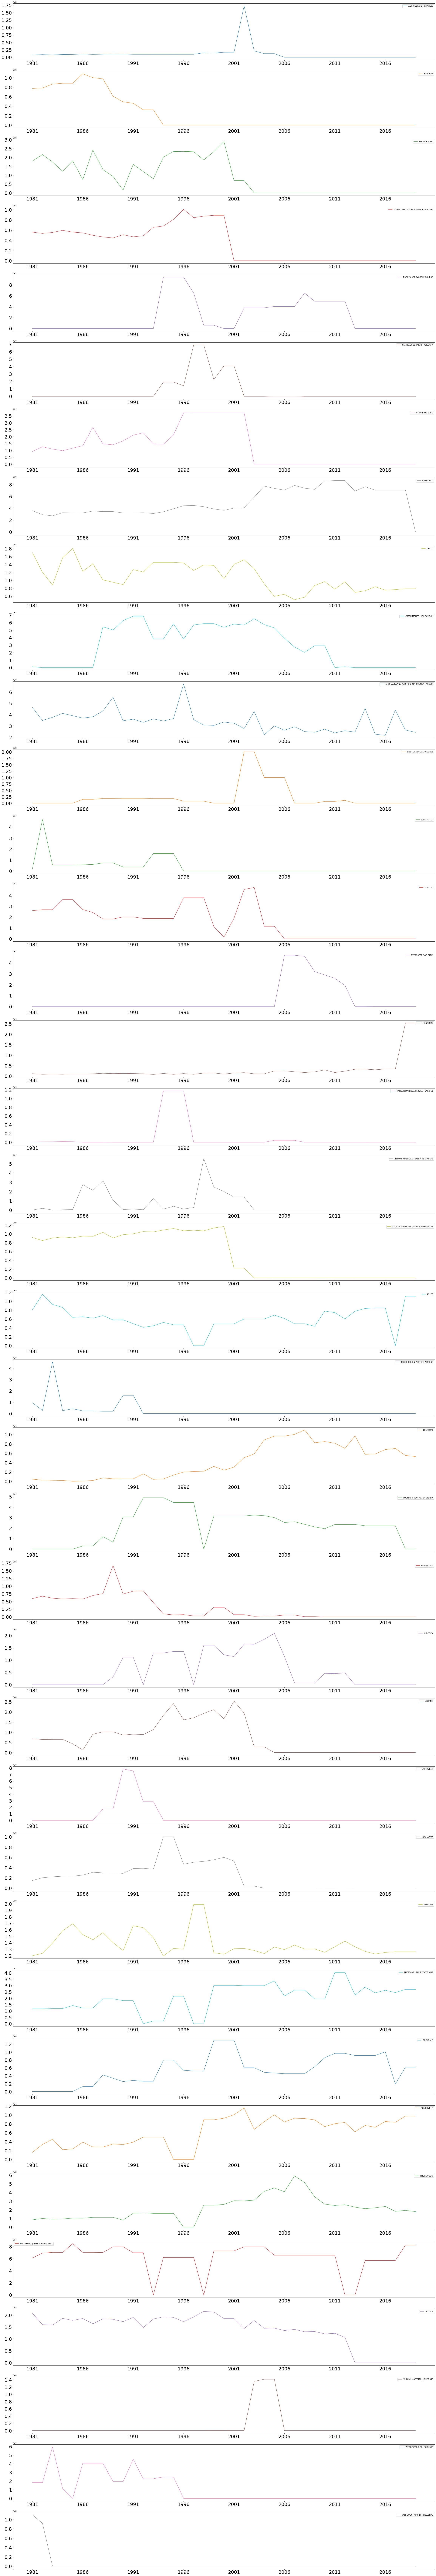

In [16]:
#plotting the modified dataframe for facility totals:
df_modified_t.plot(label='owner', subplots=True, figsize=(40,250), fontsize=25, sharex=False)
plt.show()

##Wiki Graphs

In [0]:
#Filtering out the data even more
#selecting the main facilities for our group:
df_modified=df_modified_t[['CREST HILL', 'JOLIET', 'LOCKPORT', 'ROMEOVILLE']]
#df_modified



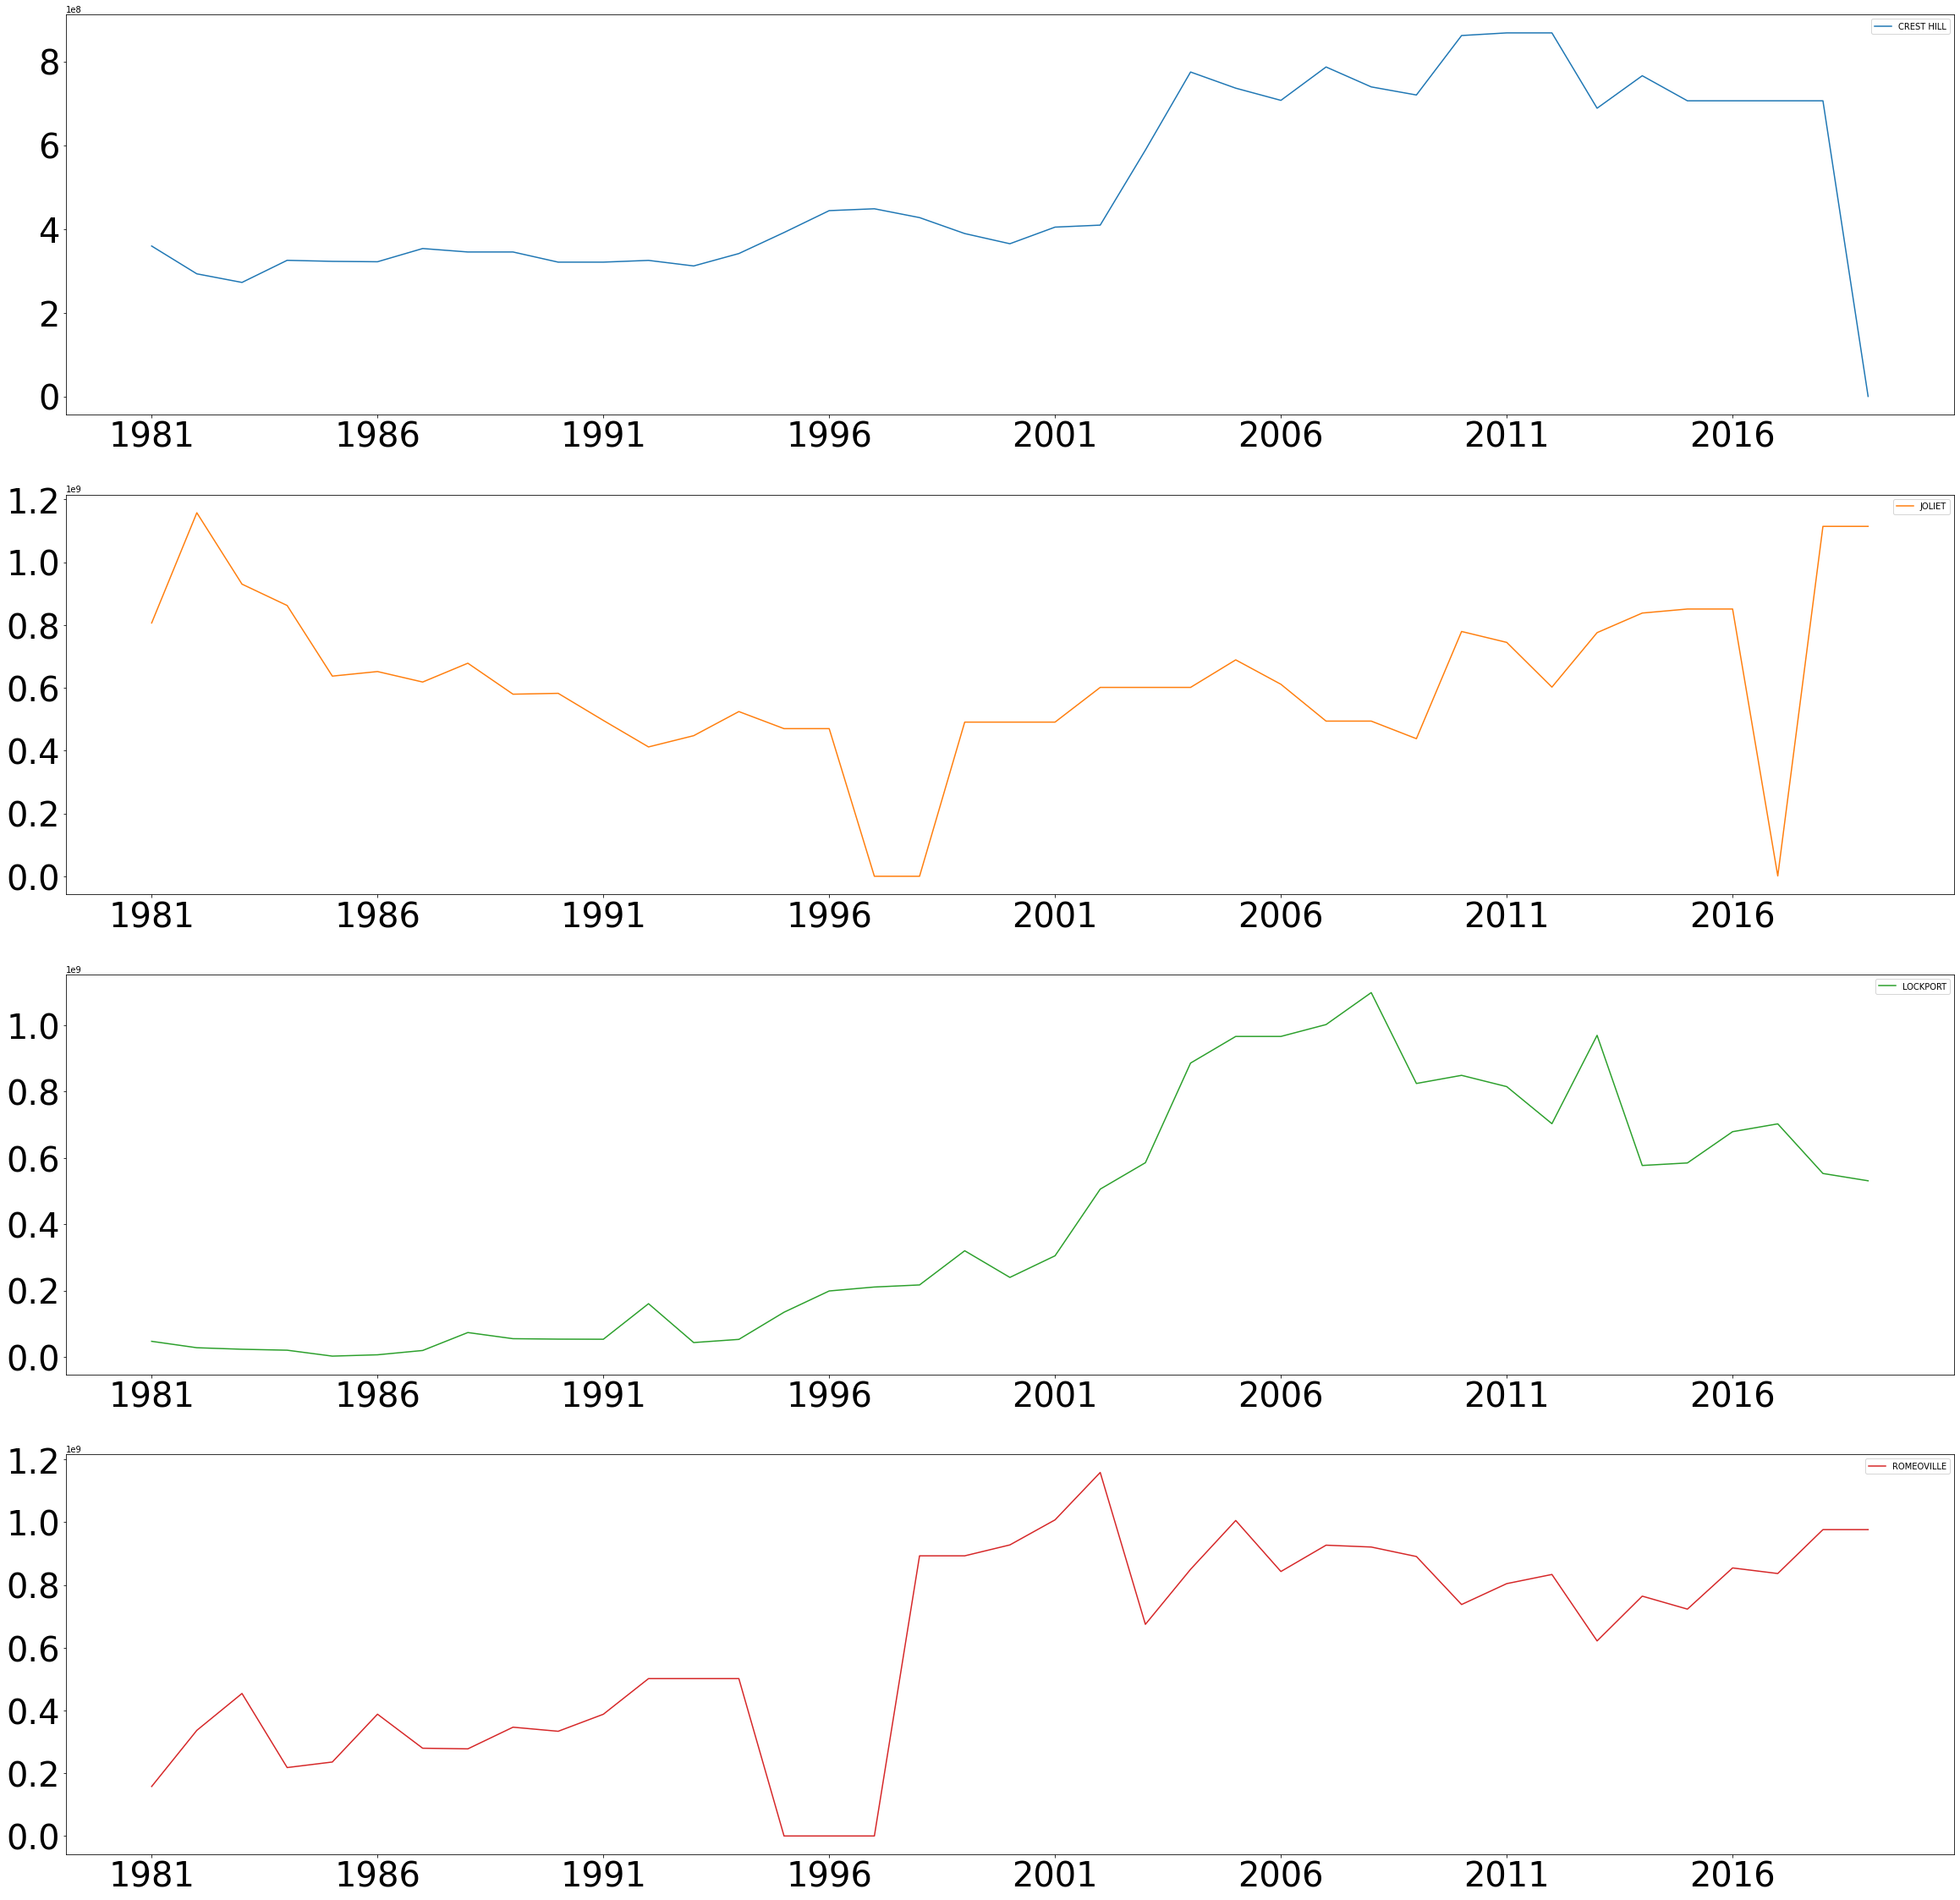

In [18]:
df_modified.plot(label='owner', subplots=True, figsize=(40,40), fontsize=40, sharex=False)
plt.show()